In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('dataset.csv')

X = data.values

def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_normalized = normalize(X)

In [5]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

k2_labels, k2_centroids = k_means(X_normalized, 2)
k3_labels, k3_centroids = k_means(X_normalized, 3)

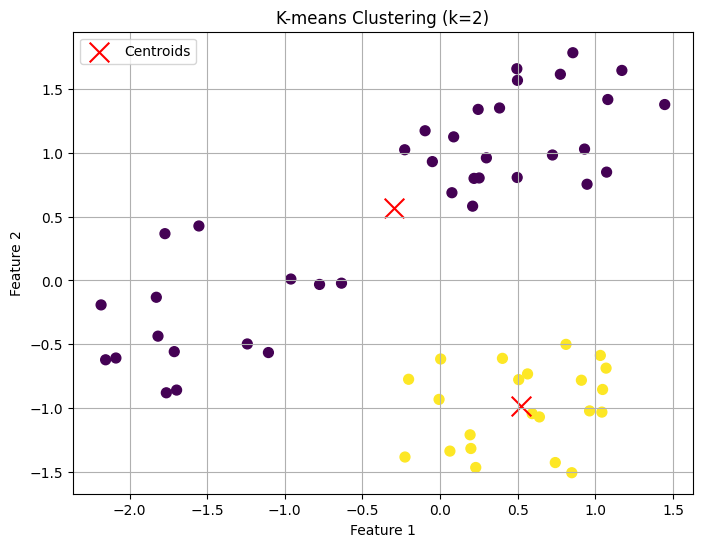

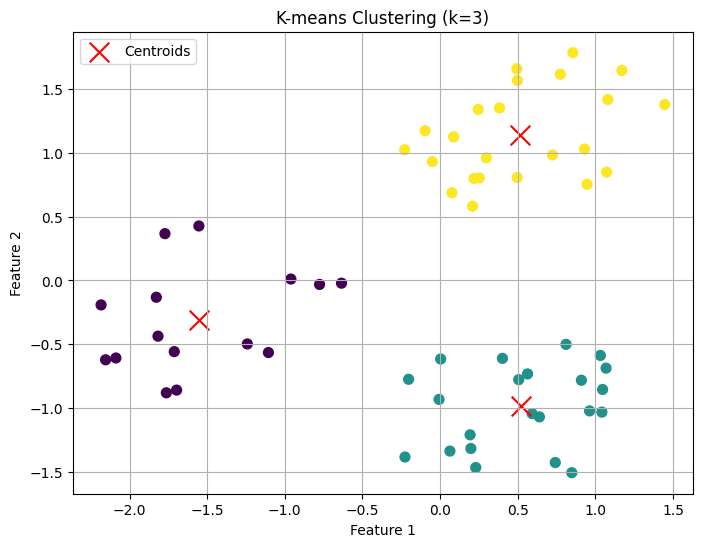

In [6]:
def plot_clusters(X, labels, centroids, k, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X_normalized, k2_labels, k2_centroids, k=2, filename="kmeans_k2.png")
plot_clusters(X_normalized, k3_labels, k3_centroids, k=3, filename="kmeans_k3.png")